<a href="https://colab.research.google.com/github/Isenlith/ProcImag/blob/master/Bordas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

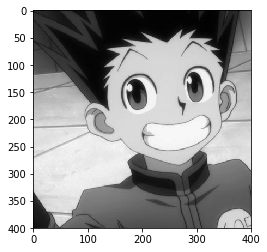

In [0]:
f_gray = cv2.imread('gon.jpg', cv2.IMREAD_GRAYSCALE)
altura, largura = f_gray.shape
plt.imshow(f_gray, cmap='gray')

##Filtro de Média

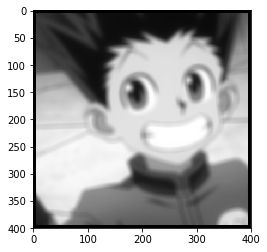

In [0]:
m = 11
borda = (m-1)//2
kernel = np.ones((m,m))/m**2
out_media = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = f_gray[x-m//2:x+m//2+1,y-m//2:y+m//2+1]
    out_media[x,y] = np.sum(kernel*janela)
    
plt.imshow(out_media, cmap='gray')

##Filtro Mediana

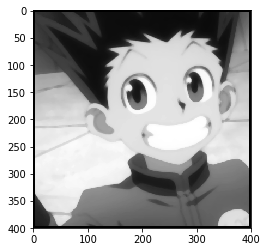

In [0]:
m = 7
borda = (m-1)//2
out_mediana = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = f_gray[x-borda:x+borda+1,y-borda:y+borda+1]
    out_mediana[x,y] = np.median(janela)
    
plt.imshow(out_mediana, cmap='gray')

##Operador Sobel

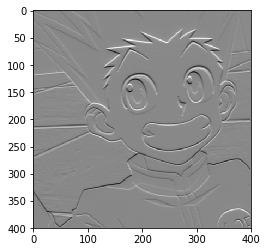

In [0]:
m = 3
borda = (m-1)//2
kernel = np.array([[-1, -2, -1],
                 [0,   0,  0],
                 [1,  2,  1]])
dx = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = f_gray[x-borda:x+borda+1,y-borda:y+borda+1]
    dx[x,y] = np.sum(kernel*janela)
    
plt.imshow(dx, cmap='gray')

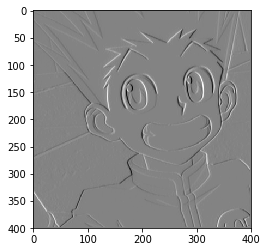

In [0]:
m = 3
borda = (m-1)//2
kernel = np.array([[-1, 0, 1],
                 [-2,  0,  2],
                 [-1,  0,  1]])
dy = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = f_gray[x-borda:x+borda+1,y-borda:y+borda+1]
    dy[x,y] = np.sum(kernel*janela)
    
plt.imshow(dy, cmap='gray')

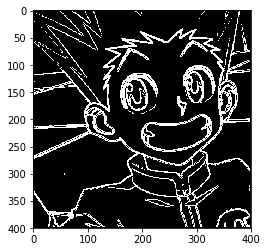

In [0]:
magnitude = np.abs(dx) + np.abs(dy)
magnitude_n = magnitude/magnitude.max()
h, b = np.histogram(magnitude, 1000)
plt.imshow(magnitude_n > 0.1, cmap='gray')

[-179.84472726 -179.77706035 -179.74535377 ...  179.84472726  179.85852923
  180.        ]


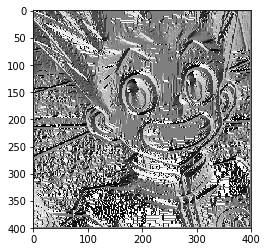

In [0]:
orientacao = np.arctan2(dy,dx)
print(np.rad2deg(np.unique(orientacao)))
plt.imshow(orientacao, cmap='gray')

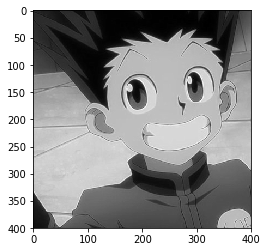

In [0]:
#alpha blend

alfa = 0.9
h = f_gray + magnitude_n*100


plt.imshow(h, cmap='gray')